In [7]:
import pyforest

In [8]:
from sklearn import datasets

In [9]:
iris = datasets.load_iris()

In [10]:
df = pd.DataFrame(iris.data)

<IPython.core.display.Javascript object>

In [11]:
df.columns = iris.feature_names

In [12]:
df['type'] = iris.target

In [13]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
type_dict = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2]
}

In [17]:
type_dict

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [18]:
df['name'] = [type_dict[x] for x in df.type]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

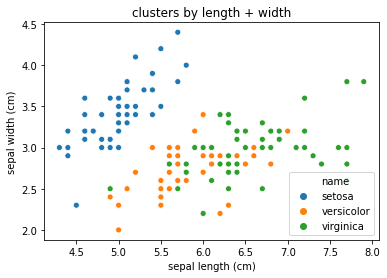

In [19]:
sns.scatterplot(df['sepal length (cm)'], df['sepal width (cm)'], hue = df['name'])
plt.title('clusters by length + width')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

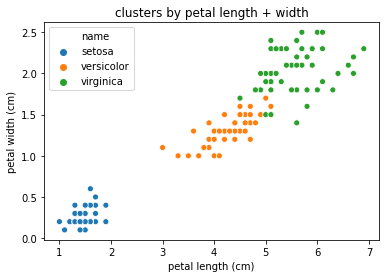

In [20]:
sns.scatterplot(df['petal length (cm)'], df['petal width (cm)'], hue = df['name'])
plt.title('clusters by petal length + width')
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
x = df.drop(['type', 'name'], axis=1).values

In [23]:
x_scale = StandardScaler().fit_transform(x)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)

In [18]:
principalComponents = pca.fit_transform(x_scale)

In [19]:
pca2_df = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

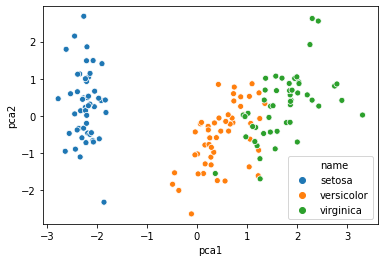

In [20]:
sns.scatterplot(pca2_df.pca1, pca2_df.pca2, hue = df.name)

In [21]:
pcasolo = PCA(n_components = 1)

In [22]:
solopca_vals = pcasolo.fit_transform(x_scale)

In [23]:
zeros = [0 for i in range(150)]

In [24]:
solo_components = []
for i in solopca_vals:
    solo_components.append(i[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

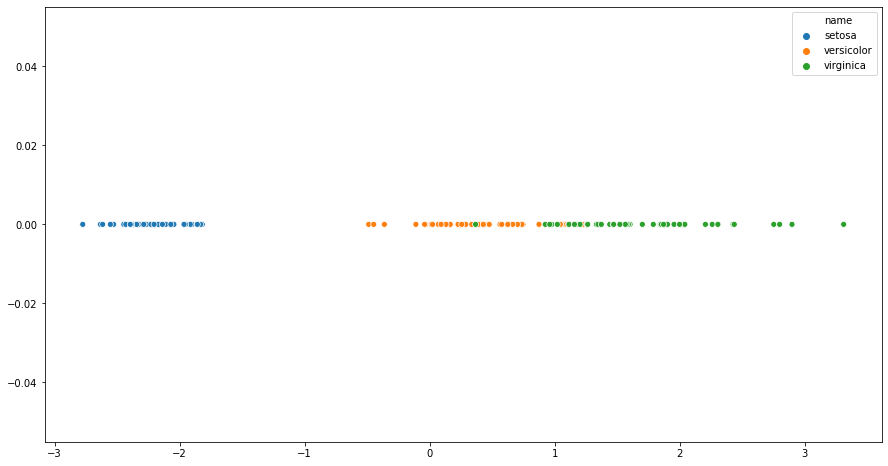

In [25]:
plt.figure(figsize = (15,8))
sns.scatterplot(solo_components, zeros, hue=df.name)
plt.show()

In [26]:
df_solo = pd.DataFrame(data=solo_components, columns=['pca1'])

<IPython.core.display.Javascript object>

In [27]:
df_solo['name'] = df.type

In [28]:
pca2_df['name'] = df.type

In [29]:
df_solo.head()

,pca1,name
0,-2.264703,0
1,-2.080961,0
2,-2.364229,0
3,-2.299384,0
4,-2.389842,0


In [30]:
pca2_df.head()

,pca1,pca2,name
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [31]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [32]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['type', 'name'], axis=1), df['type'])

<IPython.core.display.Javascript object>

In [34]:
pca1_X_train, pca1_X_test, pca1_y_train, pca1_y_test = train_test_split(df_solo.drop(['name'], axis=1),
                                                                        df['type'])


<IPython.core.display.Javascript object>

In [35]:
pca2_X_train, pca2_X_test, pca2_y_train, pca2_y_test = train_test_split(pca2_df.drop(['name'], axis=1),
                                                                        df['type'])

<IPython.core.display.Javascript object>

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

In [38]:
pca1_model = LinearRegression()

In [39]:
pca2_model = LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
pca1_model.fit(pca1_X_train, pca1_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
pca2_model.fit(pca2_X_train, pca2_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
preds = [int(round(x)) for x in model.predict(X_test)]

In [44]:
pca1_preds = [int(round(x)) for x in pca1_model.predict(pca1_X_test)]

In [45]:
pca2_preds = [int(round(x)) for x in pca2_model.predict(pca2_X_test)]

In [46]:
sklearn.metrics.accuracy_score(y_test, preds)

<IPython.core.display.Javascript object>

0.9736842105263158

In [47]:
sklearn.metrics.accuracy_score(pca1_y_test, pca1_preds)

<IPython.core.display.Javascript object>

0.868421052631579

In [48]:
sklearn.metrics.accuracy_score(pca2_y_test, pca2_preds)

<IPython.core.display.Javascript object>

0.9473684210526315

In [49]:
def pipe():   
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['type', 'name'], axis=1), df['type'])
    pca1_X_train, pca1_X_test, pca1_y_train, pca1_y_test = train_test_split(df_solo.drop(['name'], axis=1),
                                                                            df['type'])
    pca2_X_train, pca2_X_test, pca2_y_train, pca2_y_test = train_test_split(pca2_df.drop(['name'], axis=1),
                                                                            df['type'])

    model = LinearRegression()
    pca1_model = LinearRegression()
    pca2_model = LinearRegression()

    
    model.fit(X_train, y_train)
    pca1_model.fit(pca1_X_train, pca1_y_train)
    pca2_model.fit(pca2_X_train, pca2_y_train)

    
    preds = [int(round(x)) for x in model.predict(X_test)]
    pca1_preds = [int(round(x)) for x in pca1_model.predict(pca1_X_test)]
    pca2_preds = [int(round(x)) for x in pca2_model.predict(pca2_X_test)]

    
    all_4 = sklearn.metrics.accuracy_score(y_test, preds)
    solo = sklearn.metrics.accuracy_score(pca1_y_test, pca1_preds)
    two = sklearn.metrics.accuracy_score(pca2_y_test, pca2_preds)
    
    return 'all features: ', all_4, 'reduced to two ', two, 'reduced to one', solo

In [50]:
pipe()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

('all features: ',
 0.9473684210526315,
 'reduced to two ',
 0.868421052631579,
 'reduced to one',
 0.8947368421052632)

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(max_depth=2, random_state=0)

In [53]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [54]:
preds_rf = [int(round(x)) for x in rf.predict(X_test)]

In [55]:
sklearn.metrics.accuracy_score(y_test, preds_rf)

<IPython.core.display.Javascript object>

0.9736842105263158

In [56]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [57]:
from keras.datasets import mnist

Using TensorFlow backend.


In [64]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [59]:
samp = X_train[0]

<IPython.core.display.Javascript object>

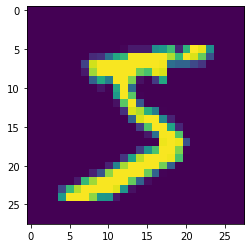

In [60]:
plt.imshow(samp)

In [61]:
X_train.shape

(60000, 28, 28)

In [62]:
new = X_train.reshape(60000, 784)

In [63]:
new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [67]:
rf = RandomForestClassifier()

In [75]:
first = np.random.choice(1000,1000)
second = np.random.choice(1000,1000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [154]:
df = pd.DataFrame(data=first, columns=['first'])
df['second'] = second
df['weights'] = .01
df['bias'] = 500

<IPython.core.display.Javascript object>

In [155]:
df['sums'] = df['first'] + df['second']

In [156]:
df

,first,second,weights,bias,sums
0,302,441,0.01,500,743
1,635,760,0.01,500,1395
2,414,609,0.01,500,1023
3,435,516,0.01,500,951
4,602,661,0.01,500,1263
...,...,...,...,...,...
995,1,839,0.01,500,840
996,664,346,0.01,500,1010
997,965,618,0.01,500,1583
998,985,847,0.01,500,1832


In [157]:
X_train = df[['first', 'second']][:800]

In [162]:
y_train = df['sums'][:800]

In [163]:
y_train

0       743
1      1395
2      1023
3       951
4      1263
       ... 
795    1542
796    1482
797     350
798    1272
799     327
Name: sums, Length: 800, dtype: int64

In [190]:
def prepare(ind):
    # return int1, int2, wt, bias
    return df.iloc[ind].drop('sums').values

# int1, int2, wt, bias = prepare(0)

def forward(i1, i2, w, b):
    final = w*(i1 + i2) + b
    return final

# fv = forward(samp)
# fv

# rs = df.iloc[0].sums
# rs

def loss(forward_value, real_sum, weight):
    ratio = (real_sum - forward_value)/real_sum
    if forward_value < real_sum:
        # make weight larger
        return wt/ratio
    if forward_value > real_sum:
        # make weight smaller 
        return wt*ratio
    if forward_value == real_sum:
        return wt

In [199]:
def epochs(how_many, index):
    curr = 1
    for i in range(how_many):
        int1, int2, wt, bias = prepare(index)
        fv = forward(int1, int2, wt, bias)
        rs = df.iloc[index].sums
        wt = loss(fv, rs, wt)
        df.iloc[index]['weights'] = wt
        print('epoch: ', curr)
        print('new weight: ', wt)
        return wt

In [200]:
epochs(10, 0)

epoch:  1
new weight:  0.03383957665271672


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.03383957665271672